# Aprendizaje Automático
# Projecto Final

Profesor: Felipe Meza

Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Estudiantes:

1. Sophia Contreras
2. Yoksan Varela
3. Mauro Víquez

Lista de las librerias por ser usadas:

In [90]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import timedelta
import re

## Descripcion del problema
En el portafolio de productos para Intervenciones Cardiacas de BSC, existe un producto llamado Watchmen. La funcion de este producto es ayudar a los pacientes que subre de una enfermedad llamada Fibrilacion Auricular No Valvular (NVAF por sus siglas en ingles), la cual consiste en un tipo comun de ritmo cardiaco irregular que afecta la parte superior del corazon (las auriculas) y puede aumentar el riesgo de coagulos sanguineos, accidentes cerebrovasculares y otras complicaciones cardiovasculares.

Tradicionalmente, el tratamiento de esta condicion implica un consumo de anti-coagulantes, lo cual puede ser una situacion tediosa y complicada para los pacientes (sin tomar en cuenta efectos secundarios del medicamento). El dispositivo Watchmen fue creado como tratamiento alternativo para esta enfermedad, ya que este se introduce dentro del corazon y su funciones de "cerrar" las cavidades donde los coagulos se pueden generar, de manera que el paciente puede minimizar el uso de medicamentos anti-coagulantes.

El siguiente enlace muestra generalidades del producto y como se implanta: https://www.youtube.com/watch?v=1f33kyMh9rM. Interesante rescatar del video que el procedimiento medico toma alrededor de 1 hora y el paciente solo debe estar hospitalizado durante un dia.

El dispositivo esta compuesto por varias partes, pero para efectos practicos, solo vamos a referirnos a la estructura de metal que esta por debajo de la malla de recubrimiento y sera referenciada como el esqueleto del Watchmen. Ese esqueleto esta hecho de Nitinol, una aleacion de niquel con titanio tiene muchas caracteristicas interesantes, pero la mas relevante para este estudio es que el Nitinol tiene memoria de forma, lo que implica que las estructuras hechas con este material van a recuperar su forma inicial despues de ser deformada, aunque esta deformacion se repita multiples veces.

Esto implica un reto a la hora de producir este esqueleto dado que, inicialmente, no tiene la formal final que se observa en el video; ademas que existen varios tamanos de Watchmen dado que existen varios tamanos de corazon. Para poder darle la forma final, el esqueleto se debe someter a diferentes tratamientos quimicos y fisicos para poder desgastar parte del material y ser moldeado al mismo tiempo.

El reto que queremos resolver podrian ser:
- Predecir cuanto material del esqueleto se va a perder durante los procesos de moldeado (Problema de regresion)
- Predecir si el esqueleto va a pasar los controles de calidad o va a ser desechado como scrap (Problema de categorizacion)

Es importante aclarar que, inicialmente, el set de datos completo cuenta con esqueletos de todos los tamanos, pero este estudio solamente sera enfocado al tamano de 20 mm.

### Primera parte: Pre-procesado del set de datos
Importemos el set de datos creando un dataframe:

In [91]:
dataset_Wathcmen = pd.read_csv("https://raw.githubusercontent.com/YoksanVC/TEC_DataScienceCert/main/Module_2_AprendizajeAutomatico/BSC_Dataset/ep_tank_chem_change_mass_scrap_dt.csv", header=0, delimiter=',')
dataset_Wathcmen.head()

,Counter,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPEndRunDT,EPMassEndRunDT,BatchNo,PartName,Size,...,EPEndRunDT_CST,start_tank_chg,end_tank_chg,tank_chg_period,conduc_test_count,total_period_mass,group_index,fi_submitter_name,UnitDispo,Part
0,0,-58.43495,8541.579,0.414121,-65537,25:47.4,12:57.7,32370648,32370648-003,27mm,...,25:47.4,9/13/2023 19:01,9/14/2023 17:56,0 days 22:55:50,0,68.8,0,ekoueba,*PASS,32370648-003
1,1,-59.41647,1378.097,7.053833,-65536,02:01.0,05:53.2,32387101,32387101-003,24mm,...,02:01.0,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-003
2,2,-59.39440,1390.652,6.905866,-65536,02:01.0,05:27.6,32387101,32387101-001,24mm,...,02:01.0,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-001
3,3,-59.42896,1374.368,6.841251,-65536,21:11.1,12:06.9,32387101,32387101-009,24mm,...,21:11.1,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-009
4,4,-59.12017,1375.269,7.009933,-65536,21:11.1,11:42.8,32387101,32387101-007,24mm,...,21:11.1,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-007


Como solo estamos interesados en los datos de esqueletos de 20mm, se procede a hacer un nuevo dataset con los datos de ese tamano:

In [92]:
dataset_20mm = dataset_Wathcmen.loc[dataset_Wathcmen['Size'] == "20mm"]
dataset_20mm.head()

,Counter,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPEndRunDT,EPMassEndRunDT,BatchNo,PartName,Size,...,EPEndRunDT_CST,start_tank_chg,end_tank_chg,tank_chg_period,conduc_test_count,total_period_mass,group_index,fi_submitter_name,UnitDispo,Part
7,7,-59.32403,1374.678,6.924414,-65536,55:16.7,06:38.8,32387011,32387011-005,20mm,...,55:16.7,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-005
8,8,-59.47844,1373.398,6.901890,-65536,55:16.7,06:16.5,32387011,32387011-004,20mm,...,55:16.7,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,WM34-Tweezers Mark/ContactMark,32387011-004
9,9,-59.34805,1365.239,7.110339,-65536,58:16.8,08:09.0,32387011,32387011-009,20mm,...,58:16.8,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-009
10,10,-59.42452,1368.157,6.715863,-65536,58:16.8,07:25.7,32387011,32387011-007,20mm,...,58:16.8,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-007
11,11,-59.41494,1384.787,6.880256,-65536,17:54.9,09:20.4,32387011,32387011-013,20mm,...,17:54.9,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-013


Analizemos la cantidad de instancias luego del filtrado:

In [93]:
dataset_20mm.shape

(1235, 26)

Contamos con 1235 instancias en este momento, con 26 columnas. Las clases en este caso es la columna llamada  "Qty Rem", la cual contiene la cantidad de material (en gramos) perdido durante el proceso; y "UnitDispo" el cual contiene si el esqueleto paso los criterior de calidad o si fue scrap. 

El problema en este momento es que tenemos 24 atributos con datos, asi que se procede a eliminar las siguientes columnas:
- Counter: Es un consecutivo creado por el proceso de extraccion de datos, no tiene utilidad.
- Size: Ya no necesitamos esta columna porque ya filtramos con los datos de esta.
- EP EQR: Numero de control de los equipos, todas las mediciones usan el mismo.
- EPEndRunDT, EPEndRunDT_CST: Estos features hacen referencia al tiempo del proceso que tienen los datos duplicados, ademas que hay otra columna de tiempo que tenemos que parece tener mejor informacion.
- Start Mass, Final Mass y Percent Rem: Estos 3 features no son necesarios porque hacen referencia a la clase de interes. El calculo que se hace en el sistema para "Qyt Rem" es la resta de Start Mass y Final Mass; Percent Rem es lo mismo que Qty Rem pero en porcentaje.
- start_tank_chg y end_tank_chg: Estos dos se puede eliminar dado que tank_chg_period es la diferencia entre ellos, lo cual es el dato de interes.
- conduc_test_count: El feature group_index provee informacion redundate de este atributo.
- total_period_mass: El feature group_index provee informacion redundate de este atributo.
- fi_submitter_name: Quien hizo el registro del dato, no es relevante para el estudio.
- Part: Feature redundante con PartName.
- BatchNo y PartName: No van a dar mucho valor dado que ambos son atributos de serializacion a nivel de produccion, pero no proveen informacion valiosa que ayuda a predecir cualquier de las dos clases, asi que ambos atributos seran eliminados del dataset.

Las siguientes columnas necesitan un poco mas de investigacion para ver si tienen que ser desechadas o no:
- ProcessEntity: Se refiere al tanque donde se hizo el proceso. Solo hay dos tanques, asi que hay que analizar si hay algun efecto con usar uno o el otro.
- Tank1ResisChk: Este feature solo tiene dos valores, y la diferencia es solo una unidad numerica entre ambos valores.

Eliminando los features mencionados anteriormente:

In [94]:
dataset_20mm = dataset_20mm.drop(columns=['Counter','Size','EP EQR','EPEndRunDT','EPEndRunDT_CST','Start Mass','Final Mass','Percent Rem','start_tank_chg','end_tank_chg','conduc_test_count','total_period_mass','fi_submitter_name','Part','BatchNo','PartName'])

In [95]:
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPMassEndRunDT,ProcessEntity,Qty Rem,tank_chg_period,group_index,UnitDispo
7,-59.32403,1374.678,6.924414,-65536,06:38.8,EPTank,39.1,0 days 08:15:25,1,*PASS
8,-59.47844,1373.398,6.901890,-65536,06:16.5,EPTank,40.9,0 days 08:15:25,1,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,-65536,08:09.0,EPTank,39.6,0 days 08:15:25,1,*PASS
10,-59.42452,1368.157,6.715863,-65536,07:25.7,EPTank,40.0,0 days 08:15:25,1,*PASS
11,-59.41494,1384.787,6.880256,-65536,09:20.4,EPTank,40.5,0 days 08:15:25,1,*PASS


In [96]:
dataset_20mm.shape

(1235, 10)

Reordenando las columnas para que ambas clases queden al extremo derecho:

In [97]:
new_order=['Tank1EPProcessTemperature','Tank1EPPumpSpeed','Tank1EPPumpFlow','Tank1ResisChk','EPMassEndRunDT','tank_chg_period','ProcessEntity','group_index','Qty Rem','UnitDispo']
dataset_20mm = dataset_20mm[new_order]
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPMassEndRunDT,tank_chg_period,ProcessEntity,group_index,Qty Rem,UnitDispo
7,-59.32403,1374.678,6.924414,-65536,06:38.8,0 days 08:15:25,EPTank,1,39.1,*PASS
8,-59.47844,1373.398,6.901890,-65536,06:16.5,0 days 08:15:25,EPTank,1,40.9,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,-65536,08:09.0,0 days 08:15:25,EPTank,1,39.6,*PASS
10,-59.42452,1368.157,6.715863,-65536,07:25.7,0 days 08:15:25,EPTank,1,40.0,*PASS
11,-59.41494,1384.787,6.880256,-65536,09:20.4,0 days 08:15:25,EPTank,1,40.5,*PASS


Se procede a analizar los 3 features en cuestion para ver si es necesario descartarlos: BatchNo, ProcessEntity y Tank1ResisChk. Para hacer este analisis, la clase UnitDispo va a ser el filtro para entender como se afecta la segregacion de los esqueletos.

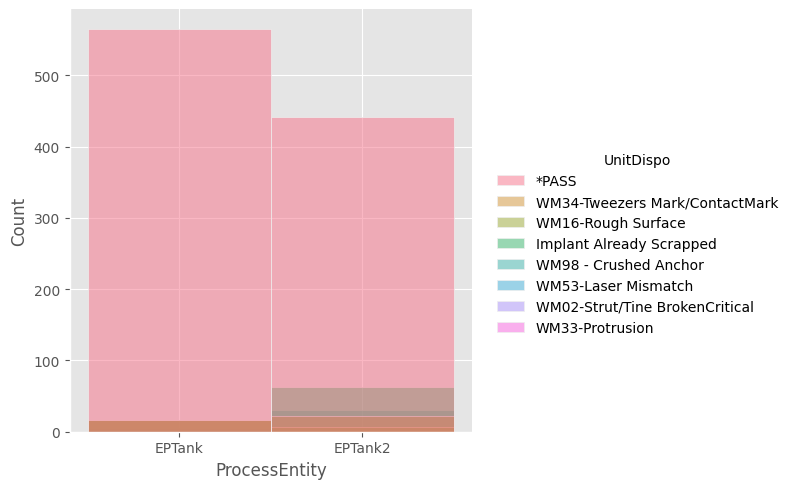

In [98]:
sns.displot(dataset_20mm, x='ProcessEntity',hue='UnitDispo')

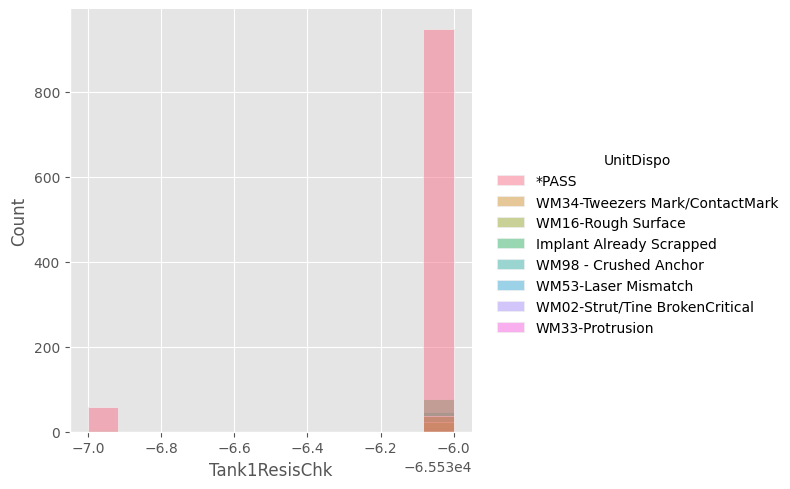

In [99]:
sns.displot(dataset_20mm, x='Tank1ResisChk',hue='UnitDispo')

El feature Tank1ResisChk no provee valor para predecir la disposicion de las unidades. Este atributo se eliminara. ProcessEntity muestra una relacion interesante con respecto a la disposicion: el EPTank genera menos scrap y cuando lo hace, es solo con el codigo de WM34, que hace referencia mas a problemas de manipulacion que otra cosa, asi que por ahora se mantendra el feature.

Por lo tanto, al final se mantienen 7 atributos para las dos clases en cuestion:
- Tank1EPProcessTemperature: Temperatura del tanque.
- Tank1EPPumpSpeed: Velocidad de bombeo.
- Tank1EPPumpFlow: Flujo de bombeo.
- EPMassEndRunDT: Tiempo de proceso.
- ProcessEntity: Tanque donde se realizo el proceso.
- tank_chg_period: Tiempo entre cambios de tanque.
- group_index: grupo de esqueletos.

In [100]:
dataset_20mm = dataset_20mm.drop(columns=['Tank1ResisChk'])

In [101]:
dataset_20mm.head(100)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,ProcessEntity,group_index,Qty Rem,UnitDispo
7,-59.32403,1374.678,6.924414,06:38.8,0 days 08:15:25,EPTank,1,39.1,*PASS
8,-59.47844,1373.398,6.901890,06:16.5,0 days 08:15:25,EPTank,1,40.9,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,08:09.0,0 days 08:15:25,EPTank,1,39.6,*PASS
10,-59.42452,1368.157,6.715863,07:25.7,0 days 08:15:25,EPTank,1,40.0,*PASS
11,-59.41494,1384.787,6.880256,09:20.4,0 days 08:15:25,EPTank,1,40.5,*PASS
...,...,...,...,...,...,...,...,...,...
140,-59.35805,1377.108,6.924267,34:58.6,0 days 18:20:25,EPTank,6,39.8,*PASS
141,-59.19410,1375.153,6.948749,34:34.7,0 days 18:20:25,EPTank,6,40.1,*PASS
142,-59.23961,1394.119,6.797583,35:39.1,0 days 18:20:25,EPTank,6,40.9,*PASS
143,-59.42232,1394.965,6.988155,35:12.6,0 days 18:20:25,EPTank,6,40.1,*PASS


Ya con el primer barrido de atributos listo, se procede a transformar los datos le las columnas que pueden ser complicados de manejar, como las dos columnas que tienen datos de tiempo. Pero antes, se va a revisar si hay NaN y eliminar esas instancias. Ademas, se revisa el tipo de datos por feature:

In [102]:
dataset_20mm.isnull().sum()

Tank1EPProcessTemperature     0
Tank1EPPumpSpeed              0
Tank1EPPumpFlow               0
EPMassEndRunDT                0
tank_chg_period               0
ProcessEntity                 0
group_index                   0
Qty Rem                       0
UnitDispo                    22
dtype: int64

In [103]:
dataset_20mm.dropna(inplace=True)
dataset_20mm.isnull().sum()

Tank1EPProcessTemperature    0
Tank1EPPumpSpeed             0
Tank1EPPumpFlow              0
EPMassEndRunDT               0
tank_chg_period              0
ProcessEntity                0
group_index                  0
Qty Rem                      0
UnitDispo                    0
dtype: int64

In [104]:
dataset_20mm.shape

(1213, 9)

In [105]:
for attribute in dataset_20mm:
    print(f"{attribute} is type {dataset_20mm[attribute].dtype}")

Tank1EPProcessTemperature is type float64
Tank1EPPumpSpeed is type float64
Tank1EPPumpFlow is type float64
EPMassEndRunDT is type object
tank_chg_period is type object
ProcessEntity is type object
group_index is type int64
Qty Rem is type float64
UnitDispo is type object


Ahora se procede a cambiar los tipos object a valores numericos. Necesitamos una funcion que cambia el formato actual a minutos:

In [106]:
def convertir_a_minutos(dato_objeto):
    # Utilizar expresión regular para extraer días, horas, minutos y segundos
    dato_objeto = re.sub(r'\s', '', dato_objeto)
    match = re.match(r'(\d+)days(\d+):(\d+):(\d+)', dato_objeto)
    match2 = re.match(r'(\d+):(\d+).(\d+)', dato_objeto)
    if match:
        dias, horas, minutos, segundos = map(int, match.groups())
        # Crear un objeto timedelta
        intervalo_tiempo = timedelta(days=dias, hours=horas, minutes=minutos, seconds=segundos)
        # Convertir a minutos
        minutos_totales = intervalo_tiempo.total_seconds() / 60
        return minutos_totales
    elif match2:
        horas, minutos, segundos = map(int, match2.groups())
        # Crear un objeto timedelta
        intervalo_tiempo = timedelta(hours=horas, minutes=minutos, seconds=segundos)
        # Convertir a minutos
        minutos_totales = intervalo_tiempo.total_seconds() / 60
        return minutos_totales
    else:
        raise ValueError("Formato no válido")

In [107]:
# Cambiando tank_chg_period
for ind in dataset_20mm.index:
    dataset_20mm['tank_chg_period'][ind] = convertir_a_minutos(dataset_20mm['tank_chg_period'][ind])

C:\Users\varely1\AppData\Local\Temp\ipykernel_3864\4267524449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['tank_chg_period'][ind] = convertir_a_minutos(dataset_20mm['tank_chg_period'][ind])
C:\Users\varely1\AppData\Local\Temp\ipykernel_3864\4267524449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['tank_chg_period'][ind] = convertir_a_minutos(dataset_20mm['tank_chg_period'][ind])
C:\Users\varely1\AppData\Local\Temp\ipykernel_3864\4267524449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [108]:
dataset_20mm.head(100)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,ProcessEntity,group_index,Qty Rem,UnitDispo
7,-59.32403,1374.678,6.924414,06:38.8,495.416667,EPTank,1,39.1,*PASS
8,-59.47844,1373.398,6.901890,06:16.5,495.416667,EPTank,1,40.9,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,08:09.0,495.416667,EPTank,1,39.6,*PASS
10,-59.42452,1368.157,6.715863,07:25.7,495.416667,EPTank,1,40.0,*PASS
11,-59.41494,1384.787,6.880256,09:20.4,495.416667,EPTank,1,40.5,*PASS
...,...,...,...,...,...,...,...,...,...
140,-59.35805,1377.108,6.924267,34:58.6,1100.416667,EPTank,6,39.8,*PASS
141,-59.19410,1375.153,6.948749,34:34.7,1100.416667,EPTank,6,40.1,*PASS
142,-59.23961,1394.119,6.797583,35:39.1,1100.416667,EPTank,6,40.9,*PASS
143,-59.42232,1394.965,6.988155,35:12.6,1100.416667,EPTank,6,40.1,*PASS


In [109]:
# Cambiando tank_chg_period
for ind in dataset_20mm.index:
    dataset_20mm['EPMassEndRunDT'][ind] = convertir_a_minutos(dataset_20mm['EPMassEndRunDT'][ind])

C:\Users\varely1\AppData\Local\Temp\ipykernel_3864\1296511234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['EPMassEndRunDT'][ind] = convertir_a_minutos(dataset_20mm['EPMassEndRunDT'][ind])
C:\Users\varely1\AppData\Local\Temp\ipykernel_3864\1296511234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['EPMassEndRunDT'][ind] = convertir_a_minutos(dataset_20mm['EPMassEndRunDT'][ind])
C:\Users\varely1\AppData\Local\Temp\ipykernel_3864\1296511234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [110]:
dataset_20mm.head(100)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,ProcessEntity,group_index,Qty Rem,UnitDispo
7,-59.32403,1374.678,6.924414,398.133333,495.416667,EPTank,1,39.1,*PASS
8,-59.47844,1373.398,6.901890,376.083333,495.416667,EPTank,1,40.9,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,489.0,495.416667,EPTank,1,39.6,*PASS
10,-59.42452,1368.157,6.715863,445.116667,495.416667,EPTank,1,40.0,*PASS
11,-59.41494,1384.787,6.880256,560.066667,495.416667,EPTank,1,40.5,*PASS
...,...,...,...,...,...,...,...,...,...
140,-59.35805,1377.108,6.924267,2098.1,1100.416667,EPTank,6,39.8,*PASS
141,-59.19410,1375.153,6.948749,2074.116667,1100.416667,EPTank,6,40.1,*PASS
142,-59.23961,1394.119,6.797583,2139.016667,1100.416667,EPTank,6,40.9,*PASS
143,-59.42232,1394.965,6.988155,2112.1,1100.416667,EPTank,6,40.1,*PASS


Ya con los atributos de tiempo convertidos en minutos, procedemos a convertir ProcessEntity a valores numericos. Como solo se tienen dos valores, vamos a usar 0 para EPTank y 1 para EPTank2:

In [111]:
dataset_20mm['ProcessEntity'].replace('EPTank',0,inplace=True)
dataset_20mm['ProcessEntity'].replace('EPTank2',1,inplace=True)
dataset_20mm.head(100)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,ProcessEntity,group_index,Qty Rem,UnitDispo
7,-59.32403,1374.678,6.924414,398.133333,495.416667,0,1,39.1,*PASS
8,-59.47844,1373.398,6.901890,376.083333,495.416667,0,1,40.9,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,489.0,495.416667,0,1,39.6,*PASS
10,-59.42452,1368.157,6.715863,445.116667,495.416667,0,1,40.0,*PASS
11,-59.41494,1384.787,6.880256,560.066667,495.416667,0,1,40.5,*PASS
...,...,...,...,...,...,...,...,...,...
140,-59.35805,1377.108,6.924267,2098.1,1100.416667,0,6,39.8,*PASS
141,-59.19410,1375.153,6.948749,2074.116667,1100.416667,0,6,40.1,*PASS
142,-59.23961,1394.119,6.797583,2139.016667,1100.416667,0,6,40.9,*PASS
143,-59.42232,1394.965,6.988155,2112.1,1100.416667,0,6,40.1,*PASS


In [112]:
print(dataset_20mm['ProcessEntity'].value_counts())

ProcessEntity
0    640
1    573
Name: count, dtype: int64


In [113]:
dataset_20mm = dataset_20mm.convert_dtypes()
for attribute in dataset_20mm:
    print(f"{attribute} is type {dataset_20mm[attribute].dtype}")

Tank1EPProcessTemperature is type Float64
Tank1EPPumpSpeed is type Float64
Tank1EPPumpFlow is type Float64
EPMassEndRunDT is type Float64
tank_chg_period is type Float64
ProcessEntity is type Int64
group_index is type Int64
Qty Rem is type Float64
UnitDispo is type string


Ahora se procede a normalizar los atributos:

In [114]:
# Guarda las últimas columnas
store_columns = dataset_20mm[['ProcessEntity','group_index','Qty Rem','UnitDispo']]

# Elimina la última columna antes de la normalización y estandarización
data_normalized = dataset_20mm.iloc[:, :-4]

In [115]:
store_columns.head()

,ProcessEntity,group_index,Qty Rem,UnitDispo
7,0,1,39.1,*PASS
8,0,1,40.9,WM34-Tweezers Mark/ContactMark
9,0,1,39.6,*PASS
10,0,1,40.0,*PASS
11,0,1,40.5,*PASS


In [116]:
# Normalización, limitando a 6 decimales
for instance in data_normalized:
    minValue = data_normalized[instance].min()
    maxValue = data_normalized[instance].max()
    data_normalized[instance] = (((data_normalized[instance] - minValue) / (maxValue - minValue))).round(6)

# Uniendo las ultimas 4 columnas
dataset_20mm = pd.concat([data_normalized, store_columns], axis=1)

dataset_20mm.head(20)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,ProcessEntity,group_index,Qty Rem,UnitDispo
7,0.388584,0.159765,0.334163,0.109608,0.088352,0,1,39.1,*PASS
8,0.320665,0.159616,0.333037,0.103475,0.088352,0,1,40.9,WM34-Tweezers Mark/ContactMark
9,0.378019,0.158667,0.343457,0.134885,0.088352,0,1,39.6,*PASS
10,0.344383,0.159006,0.323737,0.122678,0.088352,0,1,40.0,*PASS
11,0.348596,0.160941,0.331955,0.154654,0.088352,0,1,40.5,*PASS
12,0.365988,0.159984,0.329906,0.160518,0.088352,0,1,40.8,*PASS
29,0.343666,0.164135,0.337352,0.722701,0.062133,0,2,40.0,*PASS
30,0.516811,0.163888,0.337643,0.773871,0.062133,0,2,39.4,WM16-Rough Surface
31,0.334156,0.167057,0.344703,0.77885,0.062133,0,2,39.2,*PASS
32,0.369089,0.165445,0.334037,0.786666,0.062133,0,2,38.7,WM16-Rough Surface


Ya con los atributos listos, vamos a analizar un poco como responder estos con las clases, asi como analizar como se ven las clases en si. Veamos la distribucion de datos con respecto a la clase UnitDispo:

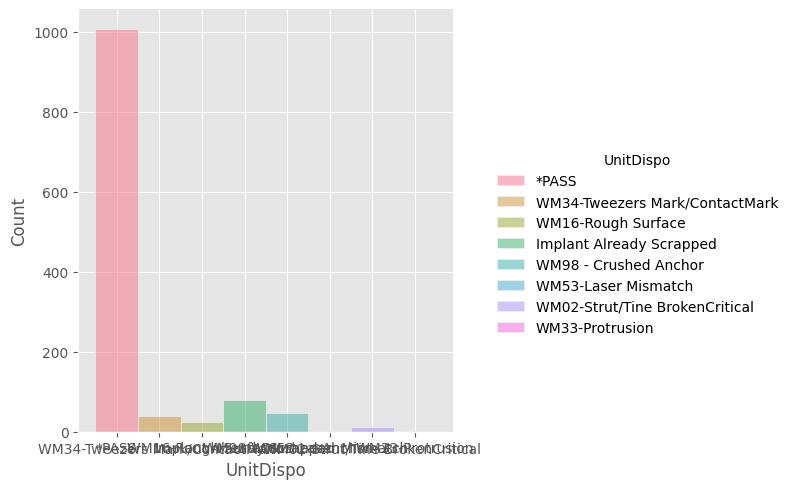

In [117]:
sns.displot(dataset_20mm, x='UnitDispo', hue='UnitDispo')

El set de datos no balanceado con respecto a la cantidad de unidades que son consideradas PASS. Veamos la cantidad de datos de forma numeral:

In [118]:
print(dataset_20mm['UnitDispo'].value_counts())

UnitDispo
*PASS                             1006
Implant Already Scrapped            79
WM98 - Crushed Anchor               47
WM34-Tweezers Mark/ContactMark      39
WM16-Rough Surface                  24
WM02-Strut/Tine BrokenCritical      12
WM53-Laser Mismatch                  3
WM33-Protrusion                      3
Name: count, dtype: Int64


Analizando estas cantidad, podemos notar que, de los defectos listados, solo se tienen 4 defectos que estan relacionados con los procesos quimicos y fisicos que se realizan para darle la forma final al esqueleto: Crushed Anchor (quebradura en las anclas del esqueleto), Rough Surface (superficie aspera), Strut/Tine BrokenCritical (esqueleto quebrado) y Protrusion (protuberancia en la superficie). Si sumamos la cantidad de esos defectos da 86, lo cual ni siquiera representa el 10% de la cantidad de datos PASS. Esta clase esta muy desbalanceada, y balancearla nos dejaria con pocas instancias.

Por esta razon se decide que vamos a filtar el dataset a solo usar los esqueletos PASS y eliminar esa columna; para asi enfocarnos en la cantidad de material perdido.

In [119]:
dataset_20mm = dataset_20mm.loc[dataset_Wathcmen['UnitDispo'] == "*PASS"]
dataset_20mm = dataset_20mm.drop(columns=['UnitDispo'])
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,ProcessEntity,group_index,Qty Rem
7,0.388584,0.159765,0.334163,0.109608,0.088352,0,1,39.1
9,0.378019,0.158667,0.343457,0.134885,0.088352,0,1,39.6
10,0.344383,0.159006,0.323737,0.122678,0.088352,0,1,40.0
11,0.348596,0.160941,0.331955,0.154654,0.088352,0,1,40.5
12,0.365988,0.159984,0.329906,0.160518,0.088352,0,1,40.8


In [120]:
dataset_20mm.shape

(1006, 8)

Analicemos la relacion de los atributos con respecto a la cantidad de material perdido:

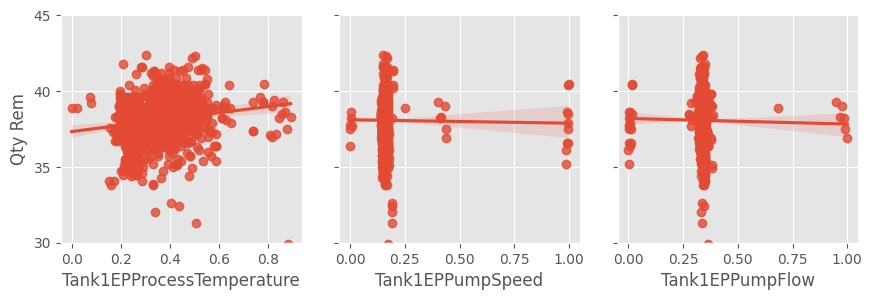

In [121]:
g = sns.PairGrid(dataset_20mm, y_vars=['Qty Rem'], x_vars=['Tank1EPProcessTemperature', 'Tank1EPPumpSpeed','Tank1EPPumpFlow'], height=3)
g.map(sns.regplot)
g.set(ylim=(30, 45), yticks=[30, 35, 40, 45])

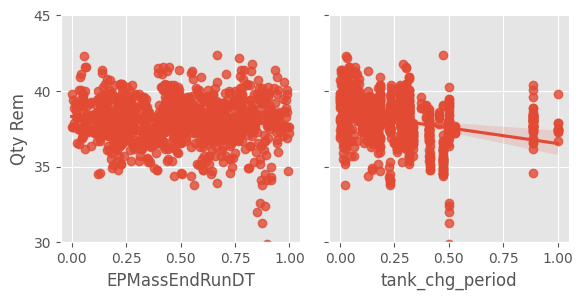

In [122]:
g = sns.PairGrid(dataset_20mm, y_vars=['Qty Rem'], x_vars=['EPMassEndRunDT', 'tank_chg_period'], height=3)
g.map(sns.regplot)
g.set(ylim=(30, 45), yticks=[30, 35, 40, 45])

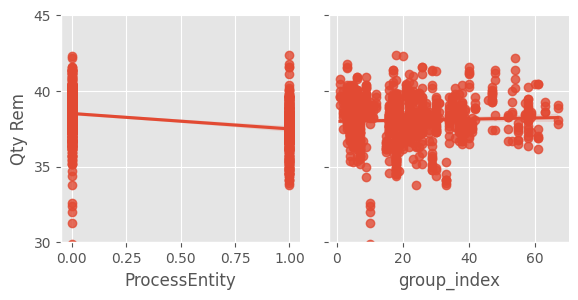

In [123]:
g = sns.PairGrid(dataset_20mm, y_vars=['Qty Rem'], x_vars=['ProcessEntity', 'group_index'], height=3)
g.map(sns.regplot)
g.set(ylim=(30, 45), yticks=[30, 35, 40, 45])

Ahora se procede a empezar con el modelado: